## Face Detection (50 points)

### 1. Read this subset into the code environment and convert all images into grayscale.

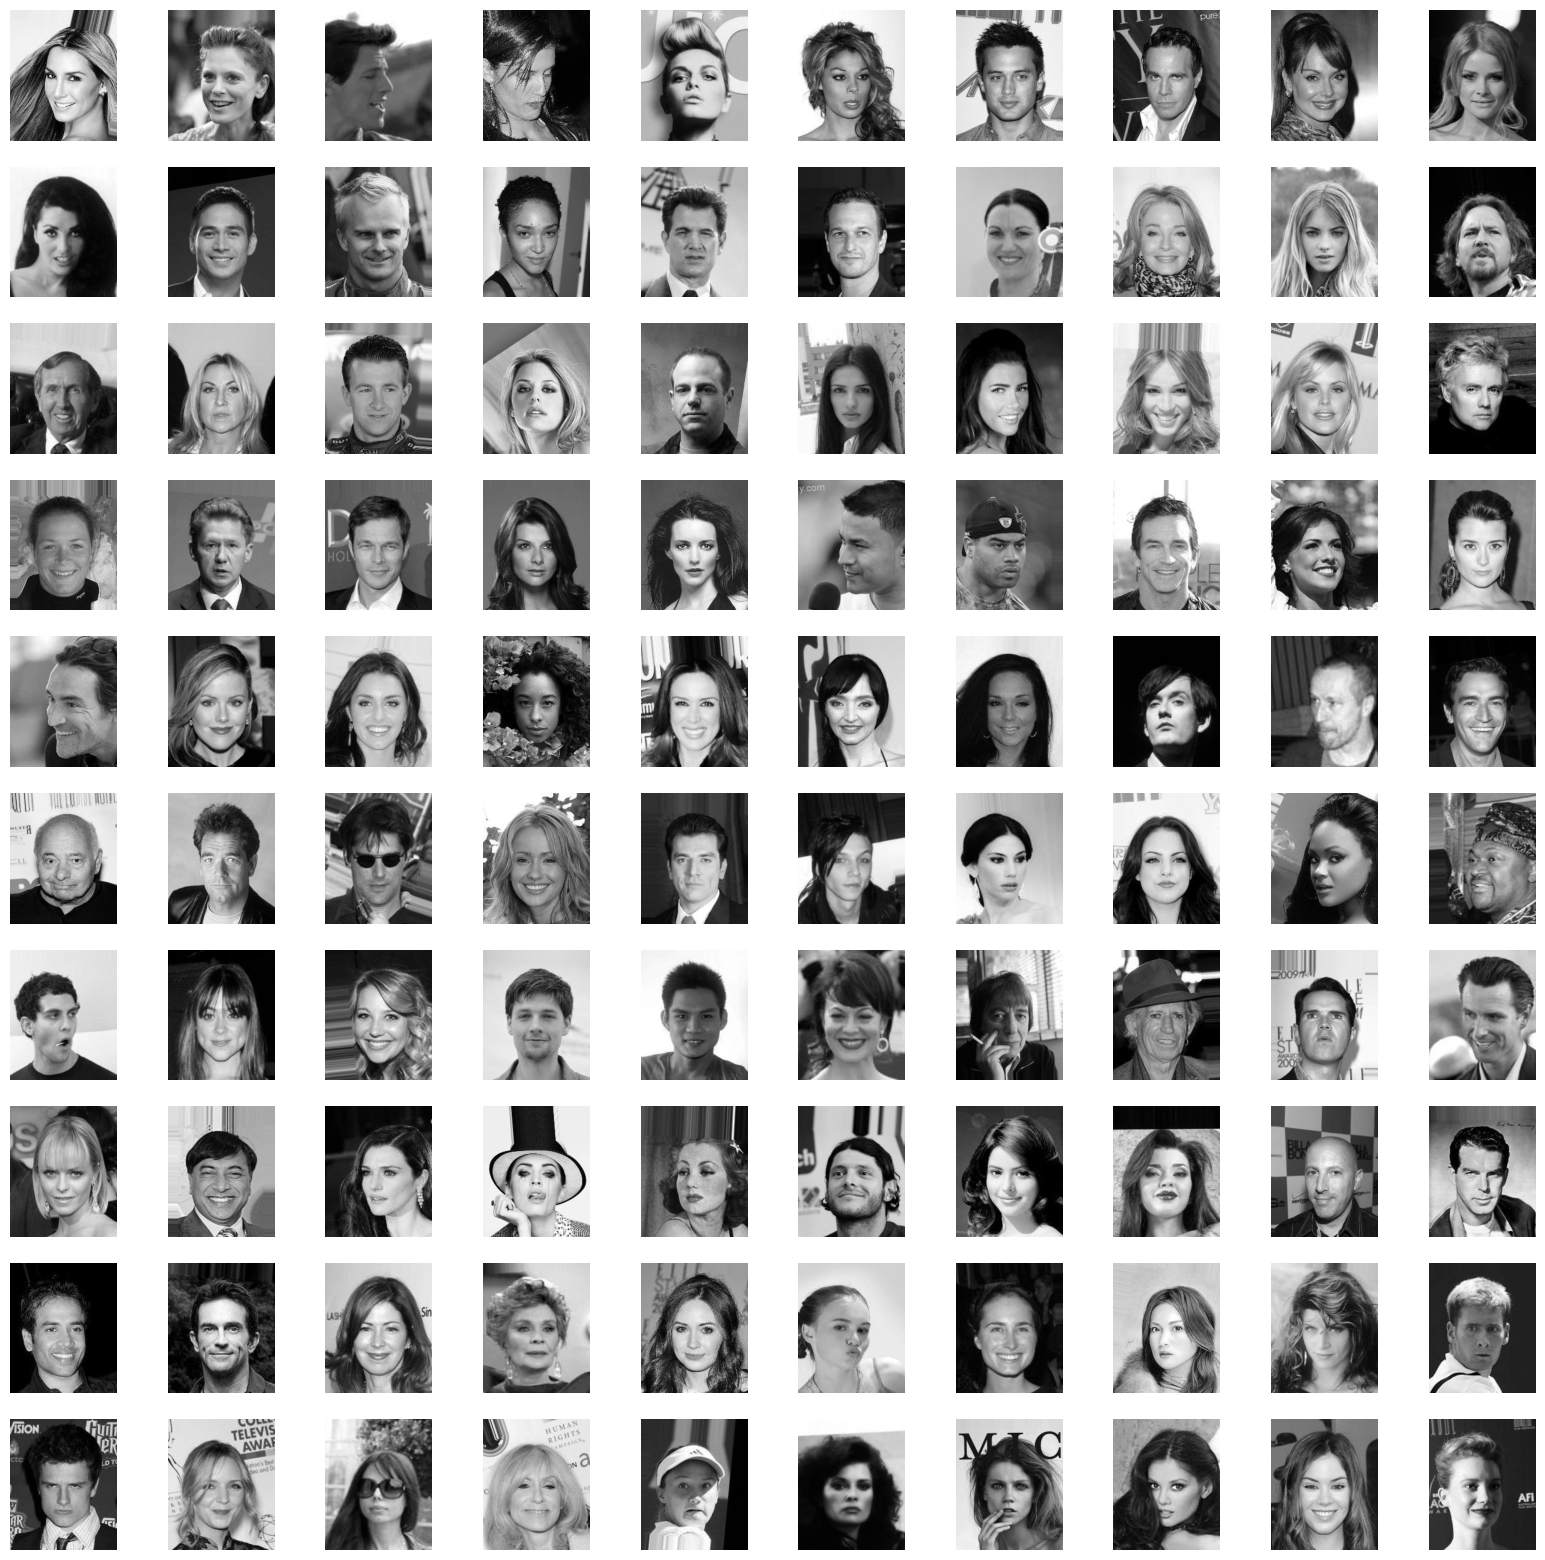

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# path = '/content/drive/My Drive/ECSE415_computer_vision/A2/'
path = '/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A3/A3-W24-images/Q2 part1/'

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to store the grayscale images
grayscale_images = []

# Load all images in the path and convert them to grayscale
for filename in os.listdir(path):
  image = cv2.imread(os.path.join(path, filename))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  grayscale_images.append(gray)
  
# Convert the list to a numpy array
grayscale_images = np.array(grayscale_images)

# Display all the images in the list in a grid of 10x10
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
  for j in range(10):
    ax[i, j].imshow(grayscale_images[i*10 + j], cmap='gray')
    ax[i, j].axis('off')
plt.show()

### 2. Implement the Snapshot method for PCA (covered in Lecture 8, Slide 55) from scratch using Numpy. Display the first five face images.

In [ ]:
# Implement the Snapshot method for PCA from scratch using Numpy. Display the first five face images.

# create matrix D whose columns are the image vectors for N images using vectorization
D = np.array([image.flatten() for image in grayscale_images])

# compute D^T
D_T = D.T

# compute D^T * D
D_T_D = np.dot(D_T, D)

# compute the eigenvectors and eigenvalues of D^T * D
eigenvalues, eigenvectors = np.linalg.eig(D_T_D)

# sort the eigenvectors by the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# compute the eigenvectors of D * D^T
eigenvectors_D_D_T = np.dot(D, eigenvectors)

# normalize the eigenvectors
eigenvectors_D_D_T = eigenvectors_D_D_T / np.linalg.norm(eigenvectors_D_D_T, axis=0)

# display the first five face images
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(eigenvectors_D_D_T[:, i].reshape(64, 64), cmap='gray')
  ax[i].axis('off')
plt.show()



### 3. Use a sliding window method to detect faces in the image, which is named Person.png under folder Q2 part2. Use the result from the previous step to compute the distance in the eigenspace between the window contents and your training data.

In [ ]:
path = '/Users/theog/Documents/CodingProjects/ECSE415_Computer_Vision/Assignments/A3/A3-W24-images/'

# Load the image
person_image = cv2.imread(path + 'Q2 part2/Person.png')
gray_person_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(gray_person_image, cmap='gray')
plt.axis('off')
plt.show()

# Sliding window method to detect faces in the image
window_size = 64
stride = 8
face_images = []
for i in range(0, gray_person_image.shape[0] - window_size, stride):
  for j in range(0, gray_person_image.shape[1] - window_size, stride):
    window = gray_person_image[i:i+window_size, j:j+window_size]
    face_images.append(window)
    
# Convert the list to a numpy array
face_images = np.array(face_images)

# Compute the distance in the eigenspace between the window contents and the training data
# create matrix D whose columns are the image vectors for N images using vectorization
D = np.array([image.flatten() for image in face_images])

# compute the eigenvectors of D * D^T
eigenvectors_D_D_T = np.dot(D, eigenvectors)

# normalize the eigenvectors
eigenvectors_D_D_T = eigenvectors_D_D_T / np.linalg.norm(eigenvectors_D_D_T, axis=0)

# Display the first five face images
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
  ax[i].imshow(eigenvectors_D_D_T[:, i].reshape(64, 64), cmap='gray')
  ax[i].axis('off')


### 4. Set a threshold to detect faces and select the best-performed value. Show your fine-tuned process

### 5. Label the detected images with bound boxes and display the final result image with labels.


### 6. Use an existing implementation of the Viola-Jones face detector to detect faces on the same image. Compare the result with the method you implemented.

### 7. Evaluate your predicted result in both methods(True/False, Positive/Negative)

### 8. Explain under what conditions the Viola-Jones detector works when PCA does not.

### 9. Evaluate the performance of this model and explain the steps that this network took to achieve the final result.